<a href="https://colab.research.google.com/github/julianafalves/Sinais-Digitais/blob/main/Projeto2_Exemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit_dsp_comm

     |████████████████████████████████| 90 kB 3.8 MB/s 


In [2]:
import sk_dsp_comm.sigsys as ss
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *

In [5]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
pylab.rcParams['figure.figsize'] = (12.0, 4.0) # default (6,4)
%config InlineBackend.figure_formats=['png'] # default for inline viewing
#config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

In [34]:
def nextpow2(x):
    return 1 if x == 0 else (x - 1).bit_length()

## Exemplo 1: Filtragem passa-baixas por convolução FFT

Neste primeiro exemplo, o objetivo é aplicar um filtro passa-baixas em um sinal $x[n]$ utilizando a FFT.

* $x[n]$ é um sinal de $256$ amostras, composto pelos senoides de frequências $440$, $880$, $1000$ e $2000\ \text{Hz}$.

* A taxa de amostragem $f_s = 5000\ \text{Hz}$ permite que o sinal possa ser amostrado corretamente, já que a maior frequência é de $f_{max} = 2000\ \text{Hz}$ e, assim, $f_s > 2\ f_{max}$.



In [4]:
# Frequências dos senoides do sinal
frequencias = [440, 880, 1000, 2000]

tam_sinal = 256
taxa_amostragem = 5000

# Inicializando o sinal com zeros
x = np.zeros(tam_sinal)

# Criando a variável contador [n]
n = np.arange(0, tam_sinal)

for f in frequencias:
  # Somar o senoide formado por cada frequência
  # e amostrado na taxa determinada
  x += np.sin(2.0 * np.pi * n * f / taxa_amostragem)

Podemos visualizar sinal $x[n]$ por meio do método `stem`:

Text(0, 0.5, 'Amplitude')

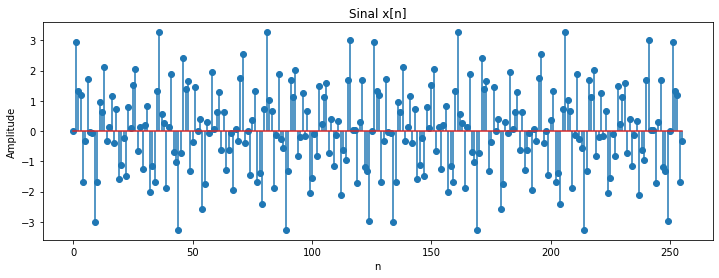

In [23]:
stem(x, use_line_collection=True)
plt.title('Sinal x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

E visualizando um pouco mais de perto:

Text(0, 0.5, 'Amplitude')

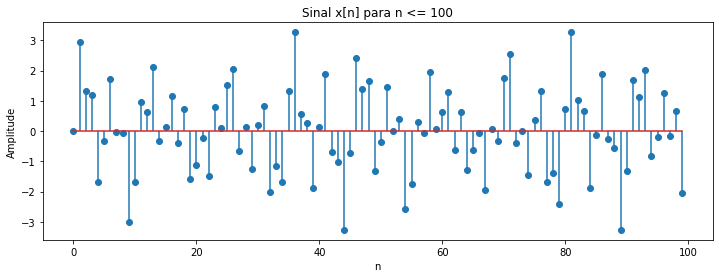

In [24]:
stem(x[:100], use_line_collection=True)
plt.title('Sinal x[n] para n <= 100')
plt.xlabel('n')
plt.ylabel('Amplitude')

Com o sinal definido, agora o filtro é criado pelo método da janela.

* O filtro passa-baixas possui $257$ amostras e a frequência de corte definida como $600\ \text{Hz}$.



In [11]:
tam_filtro = 257
freq_corte = 600
intervalo = (tam_filtro - 1) / 2

# Filtro pelo método da janela
h_sup = np.arange(-intervalo, intervalo+1)
h_ideal = (2.0 * freq_corte / taxa_amostragem) * np.sinc(2.0 * freq_corte * h_sup / taxa_amostragem)

# Aplicar o hamming para suavizar os "cantos" do filtro
h = np.hamming(tam_filtro) * h_ideal

Com isto, também podemos visualizar o filtro (sem e com a aplicação de hamming):

Text(0, 0.5, 'Amplitude')

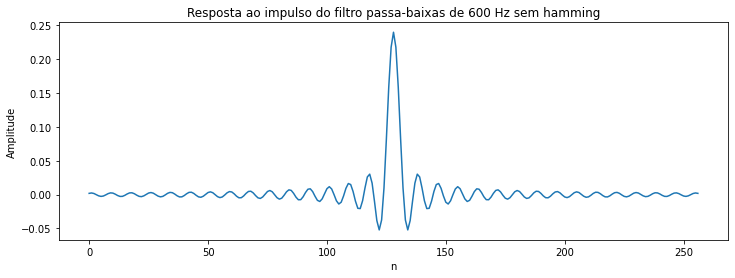

In [32]:
plt.plot(h_ideal)
plt.title('Resposta ao impulso do filtro passa-baixas de 600 Hz sem hamming')
plt.xlabel('n')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

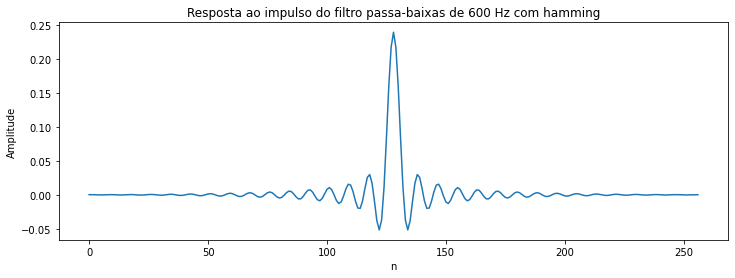

In [30]:
plt.plot(h)
plt.title('Resposta ao impulso do filtro passa-baixas de 600 Hz com hamming')
plt.xlabel('n')
plt.ylabel('Amplitude')

In [35]:
# Quantidade de amostras de FFT -- potência de 2
Nfft = 2**nextpow2(tam_sinal+tam_filtro-1)

# Preenchendo com 0 o final da entrada e da resposta
xzp = np.pad(x, (0, Nfft-tam_sinal))
hzp = np.pad(h, (0, Nfft-tam_filtro))

# FFT de cada sinal
X = fftpack.fft(xzp)
H = fftpack.fft(hzp)

In [ ]:
intervalo_frequencias = fftpack.fftfreq(X.size, d=1.0/taxa_amostragem)

plt.plot(intervalo_frequencias, np.abs(X)**2)
plt.title('Resposta em amplitude do filtro passa-baixas de 600 Hz')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
# plt.ylim((0,130))
plt.xlim((-2500, 2500))
_ = plt.xticks(np.arange(-2500, 2501, 500))

# plt.figure(figsize=(12,4))
# _ = plt.magnitude_spectrum(xzp, taxa_amostragem, window=mlab.window_none, sides='twosided')
# plt.ylim((0,0.5))
# plt.xlim((-2500, 2500))
# _ = plt.xticks(np.arange(-2500, 2501, 500))

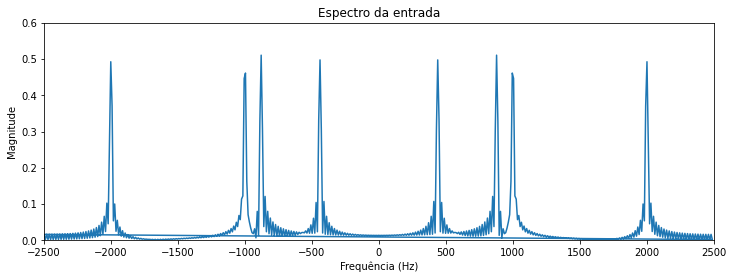

In [99]:
intervalo_frequencias = fftpack.fftfreq(X.size, d=1.0/taxa_amostragem)

plt.plot(intervalo_frequencias, np.abs(X/tam_sinal))
plt.title('Espectro da entrada')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.ylim((0,0.6))
plt.xlim((-2500, 2500))
_ = plt.xticks(np.arange(-2500, 2501, 500))

E também podemos ver a resposta em amplitude do filtro, para entender melhor seu comportamento em relação às frequências:

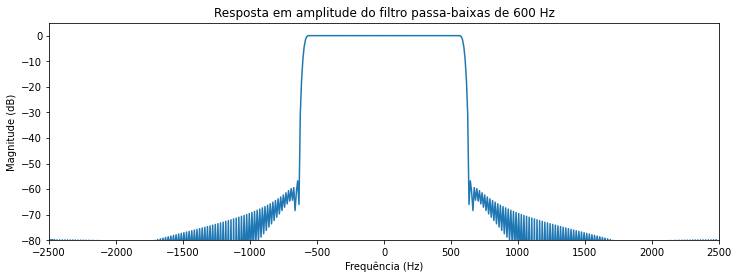

In [101]:
intervalo_frequencias = fftpack.fftfreq(H.size, d=1.0/taxa_amostragem)

plt.plot(intervalo_frequencias, 10*np.log10(np.abs(H)**2))
plt.title('Resposta em amplitude do filtro passa-baixas de 600 Hz')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.ylim(-80, 5)
plt.xlim((-2500, 2500))
_ = plt.xticks(np.arange(-2500, 2501, 500))

In [103]:
Y = X * H

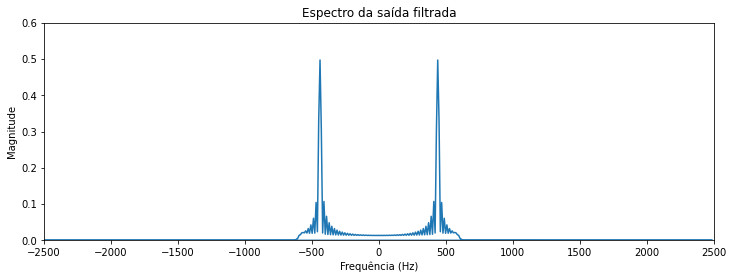

In [107]:
plt.plot(intervalo_frequencias, np.abs(Y/tam_sinal))
plt.title('Espectro da saída filtrada')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.ylim((0, 0.6))
plt.xlim((-2500, 2500))
_ = plt.xticks(np.arange(-2500, 2501, 500))

In [109]:
y = ifft(Y)
relrmserr = np.linalg.norm(np.imag(y)/np.linalg.norm(y))
y = np.real(y)

(0.0, 512.0)

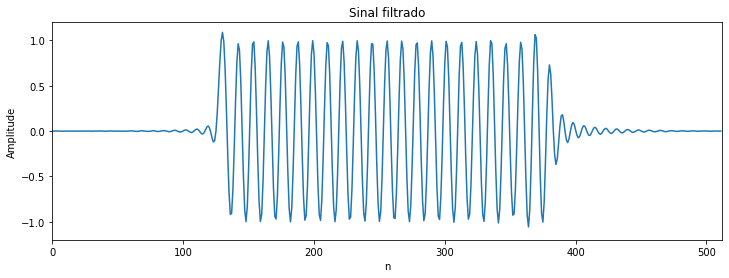

In [113]:
plt.plot(y)
plt.title('Sinal filtrado')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.ylim((-1.2, 1.2))
plt.xlim((0, Nfft))